# Pyvista visualization - broken on vtk for py39

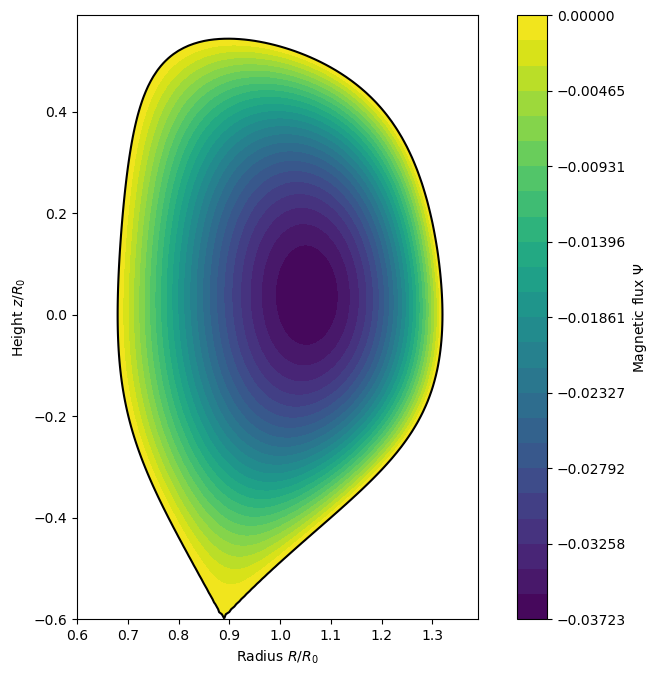

In [1]:
import astropy.units as u
import numpy as np

from plasmapy.particles import IonizationStateCollection

all_species = IonizationStateCollection(
    {
        "H": [0, 1],
        #      "D": [0, 1],   raises ParticleError, why?
        "C": [0, 0, 0, 0, 0, 0, 1],
    },
    n0=1e20 * u.m ** -3,
    abundances={"H": 1, "C": 0.08},
    T_e=10 * u.eV,
)

## `SymbolicEquilibrium`

from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = {"aspect_ratio": 0.32, "A": -0.155, "elongation": 1.7, "triangularity": 0.33}
eq = SymbolicEquilibrium(**params, B0=5.2, config="single-null")
eq.plot();

In [2]:
eq.psisym

0.15888055491167*R**6*log(R) - 0.242130474643052*R**6 - 1.90656665894004*R**4*Z**2*log(R) + 2.11116292115827*R**4*Z**2 + 1.03225575549707*R**4*Z*log(R) - 1.21928446464091*R**4*Z + 0.685680947933434*R**4*log(R) + 0.0605795594787041*R**4 + 1.27104443929336*R**2*Z**4*log(R) - 0.454158617968831*R**2*Z**4 - 1.37634100732943*R**2*Z**3*log(R) + 0.593456864024138*R**2*Z**3 - 2.74272379173374*R**2*Z**2*log(R) - 1.72186108171512*R**2*Z**2 + 1.82053360634878*R**2*Z*log(R) + 1.00037446462688*R**2*Z + 0.170105114150866*R**2*log(R) + 0.0776775859471283*R**2 - 0.0847362959528905*Z**6 + 0.137634100732943*Z**5 + 0.457120631955623*Z**4 - 0.606844535449594*Z**3 - 0.247605114150867*Z**2 + 0.207902757241057*Z + 0.0680021186726767

In [3]:
import sympy

In [4]:
r, z = eq.symbols
x, y = sympy.symbols('x y')

In [5]:
psisym3d = eq.psisym.subs(r, sympy.sqrt(x**2 + y**2)).simplify()

-0.0847362959528905*Z**6 + 0.137634100732943*Z**5 + 0.635522219646679*Z**4*(x**2 + y**2)*log(x**2 + y**2) - 0.454158617968831*Z**4*(x**2 + y**2) + 0.457120631955623*Z**4 - 0.688170503664715*Z**3*(x**2 + y**2)*log(x**2 + y**2) + 0.593456864024138*Z**3*(x**2 + y**2) - 0.606844535449594*Z**3 - 0.953283329470018*Z**2*(x**2 + y**2)**2*log(x**2 + y**2) + 2.11116292115827*Z**2*(x**2 + y**2)**2 - 1.37136189586687*Z**2*(x**2 + y**2)*log(x**2 + y**2) - 1.72186108171512*Z**2*(x**2 + y**2) - 0.247605114150867*Z**2 + 0.516127877748536*Z*(x**2 + y**2)**2*log(x**2 + y**2) - 1.21928446464091*Z*(x**2 + y**2)**2 + 0.91026680317439*Z*(x**2 + y**2)*log(x**2 + y**2) + 1.00037446462688*Z*(x**2 + y**2) + 0.207902757241057*Z + 0.0776775859471283*x**2 + 0.0776775859471283*y**2 + 0.0794402774558348*(x**2 + y**2)**3*log(x**2 + y**2) - 0.242130474643052*(x**2 + y**2)**3 + 0.342840473966717*(x**2 + y**2)**2*log(x**2 + y**2) + 0.0605795594787041*(x**2 + y**2)**2 + 0.0850525570754332*(x**2 + y**2)*log(x**2 + y**2) +

In [6]:
X, Y, Z =  np.mgrid[-1.5:1.5:50j, -1.5:1.5:50j, -1:1:10j]

In [7]:
psi3dfunc = sympy.lambdify((x, y, z), psisym3d, modules='numpy')

<function _lambdifygenerated(x, y, Z)>

In [8]:
psi3dvals = psi3dfunc(X, Y, Z)
psi3dvals = np.clip(psi3dvals, None, 0)

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.00181392],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.00181392]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [9]:
xarray.DataArray?

Object `xarray.DataArray` not found.


In [10]:
import xarray
psi_arr = xarray.DataArray(
    psi3dvals,
    dims = ["x", "y", "z"],
    coords=dict(
        X=(["x", "y", "z"], X),
        Y=(["x", "y", "z"], Y),
        Z=(["x", "y", "z"], Z),
    )
)

<xarray.DataArray (x: 50, y: 50, z: 10)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.00181392],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.00181392]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.00181392],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , -0.00181392]]])
Coordinates:
    X        (x, y, z) float64 -1.5 -1.5 -1.5 -1.5 -1.5 ... 1.5 1.5 1.5 1.5 1.5
    Y        (x, y, z) float64 -1.5 -1.5 -1.5 -1.5 -1.5 ... 1.5 1.5 1.5 1.5 1.5
    Z        (x, y, z) float64 -1.0 -0.7778 -0.5556 ... 0.5556 0.7778 1.0
Dimensions without coordinates: x, y, z

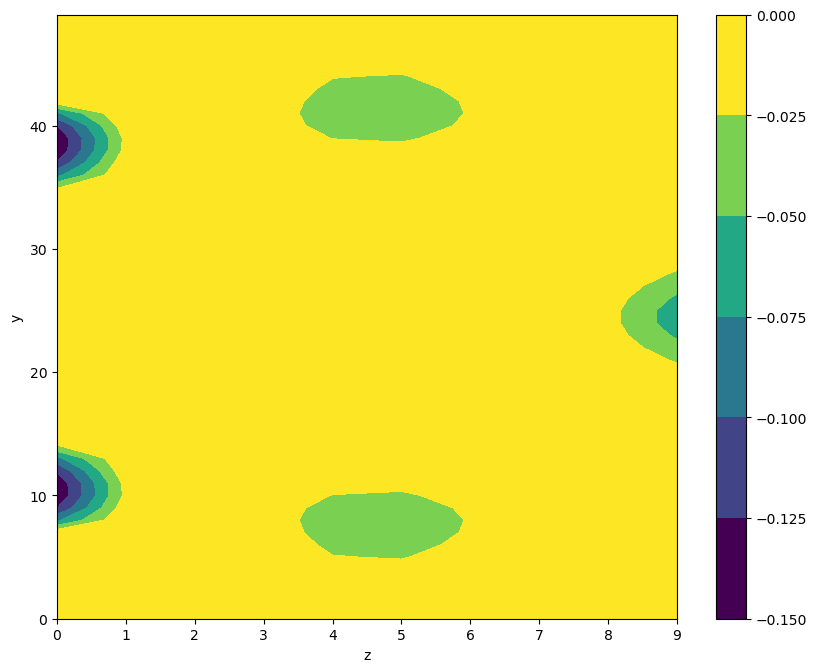

In [11]:
psi_arr.isel(x=25).plot.contourf()

In [12]:
import pyvista as pv

In [13]:
values = psi3dvals;

In [14]:
[np.mean(np.diff(np.unique(arr))) for arr in [X, Y, Z]]

[0.061224489795918366, 0.061224489795918366, 0.2222222222222222]

In [ ]:
grid = pv.UniformGrid()
# Set the grid dimensions: shape because we want to inject our values on the
#   POINT data
grid.dimensions = values.shape

# Edit the spatial reference
# grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = [np.mean(np.diff(np.unique(arr))) for arr in [X, Y, Z]]

# Add the data values to the cell data
grid.point_arrays["values"] = values.flatten(order="F")  # Flatten the array!

# Now plot the grid!
grid.plot(show_edges=True)

/home/dominik/.local/lib/python3.9/site-packages/pyvista/plotting/plotting.py:96: UserWarning: 
This system does not appear to be running an xserver.
PyVista will likely segfault when rendering.

Try starting a virtual frame buffer with xvfb, or using
  ``pyvista.start_xvfb()``

  warnings.warn('\n'


In [ ]:
pyvista.plot

In [ ]:
from pyvista import demos
demos.plot_logo(background='white', jupyter_backend='panel')

In [ ]:
import pyvista

In [ ]:
# Create the spring profile (a circle).
plotter = pyvista.Plotter()

vertices = np.array(
    [
        [1.0, 0.0, 0.0],
        [1.0732, 0.0, -0.1768],
        [1.25, 0.0, -0.25],
        [1.4268, 0.0, -0.1768],
        [1.5, 0.0, 0.00],
        [1.4268, 0.0, 0.1768],
        [1.25, 0.0, 0.25],
        [1.0732, 0.0, 0.1768],
    ]
)
faces = np.hstack([[8, 0, 1, 2, 3, 4, 5, 6, 7]])
profile = pyvista.PolyData(vertices, faces)

# Extrude the profile to make a spring.
spring = profile.extrude_rotate(resolution=360, translation=6.0, dradius=1.0, angle=2160.0)
plotter.add_text("Spring", font_size=24)
plotter.add_mesh(spring, color="tan", show_edges=True)

plotter.show(cpos="zx")


## `FluxSurface`

In [ ]:
ax = eq.plot()
flux_surface = eq.get_flux_surface(-0.01)
flux_surface.plot(ax, n=True);

## Multiple flux surfaces - radial grid

In [ ]:
ax = eq.plot()
for fs in eq.get_multiple_flux_surfaces(np.linspace(-0.037228, 0, 50)):
    fs.plot(ax)
ax.legend().remove()

## `FlowCalculator`

In [ ]:
from plasmapy.transport.flows import FlowCalculator

density_gradient = {
    "H 1+": 1e18 * u.m ** -3 / u.m,
    "C 1+": 1e18 * u.m ** -3 / u.m,
}
temperature_gradient = {
    "H 1+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
    "C 1+": (-1 * u.eV).to(u.K, equivalencies=u.temperature_energy()) / u.m,
}

fc = FlowCalculator(all_species, flux_surface, density_gradient, temperature_gradient)

### Units

In [ ]:
sym = "H 1+"
S_pt = fc.S_pt[sym]

In [ ]:
Aai = fc.Aai[sym]

In [ ]:
H = fc.all_species["H"]

In [ ]:
(S_pt / Aai).si

### Bootstrap current

In [ ]:
fc.bootstrap_current.si  # TODO should be A/m^2? missing a magnetic field in the denominator somewhere?

In [ ]:
(fc.bootstrap_current / u.T).to(u.A / u.m ** 2)

### Fluxes

The units are horribly off for each of them atm.

In [ ]:
flux_unit = u.m ** -2 / u.s

In [ ]:
fc._fluxes_BP

In [ ]:
fc._fluxes_BP["H 1+"].particle_flux.to(flux_unit)

In [ ]:
fc._fluxes_BP["H 1+"].heat_flux.to(u.J * flux_unit)

In [ ]:
fc._fluxes_CL

In [ ]:
(fc._fluxes_CL["H 1+"].particle_flux / (u.kg / u.s / u.m ** 4)).to(flux_unit)

In [ ]:
(fc._fluxes_CL["H 1+"].heat_flux / (u.kg / u.s / u.m ** 4)).to(u.J * flux_unit)

In [ ]:
fc._fluxes_PS

In [ ]:
(fc._fluxes_PS["H 1+"].particle_flux / (u.kg / u.s / u.m ** 3)).to(flux_unit)

In [ ]:
(fc._fluxes_PS["H 1+"].heat_flux / (u.kg / u.s / u.m ** 3)).to(u.J * flux_unit)

In [ ]:
flux_unit = u.m ** -2 / u.s

In [ ]:
[
    (flux[sym].particle_flux.unit.si / flux_unit).si
    for flux in [fc._fluxes_BP, fc._fluxes_CL, fc._fluxes_PS]
]

In [ ]:
[
    (flux[sym].heat_flux.unit / flux_unit / u.J).si
    for flux in [fc._fluxes_BP, fc._fluxes_CL, fc._fluxes_PS]
]